# Lab 4-4: Atmospheric temperatures and stability
Written by Daniel Hogan - April, 2023.

Modified by Jessica Lundquist - April, 2023.

Modified by Eli Schwat - January 2024.

In [17]:
import xarray as xr
import numpy as np
import os 
import urllib
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import altair as alt

## SOS Data

In [3]:
sos_file = "../data/sos_full_dataset_30min.nc"
sos_dataset = xr.open_dataset(sos_file)

## Extract temperature data

In [15]:
T_vars = [
    'Tsurf_c', 
    'T_1m_c', 'T_2m_c', 'T_3m_c', 'T_4m_c', 'T_5m_c', 
    'T_6m_c', 'T_7m_c', 'T_8m_c', 'T_9m_c', 'T_10m_c', 
    'T_11m_c', 'T_12m_c', 'T_13m_c', 'T_14m_c', 'T_15m_c', 
    'T_16m_c', 'T_17m_c', 'T_18m_c', 'T_19m_c', 'T_20m_c'
]
air_temp_df = sos_dataset[
    T_vars
    
].to_dataframe().melt(ignore_index=False)
air_temp_df

,variable,value
time,,
2022-11-01 00:00:00,Tsurf_c,-9.308777
2022-11-01 00:30:00,Tsurf_c,-9.023499
2022-11-01 01:00:00,Tsurf_c,-9.931488
2022-11-01 01:30:00,Tsurf_c,-9.524658
2022-11-01 02:00:00,Tsurf_c,-9.457214
...,...,...
2023-06-19 15:30:00,T_20m_c,18.424438
2023-06-19 16:00:00,T_20m_c,18.387238
2023-06-19 16:30:00,T_20m_c,18.592438


Assign a height variable based on the variable name

In [16]:
var_to_height = {
    'Tsurf_c' : 0,
    'T_1m_c' : 1,
    'T_2m_c' : 2,
    'T_3m_c' : 3,
    'T_4m_c' : 4,
    'T_5m_c' : 5,
    'T_6m_c' : 6,
    'T_7m_c' : 7,
    'T_8m_c' : 8,
    'T_9m_c' : 9,
    'T_10m_c' : 10,
    'T_11m_c' : 11,
    'T_12m_c' : 12,
    'T_13m_c' : 13,
    'T_14m_c' : 14,
    'T_15m_c' : 15,
    'T_16m_c' : 16,
    'T_17m_c' : 17,
    'T_18m_c' : 18,
    'T_19m_c' : 19,
    'T_20m_c' : 20,
}
air_temp_df['height'] = air_temp_df.variable.apply(var_to_height.get)
air_temp_df

,variable,value,height
time,,,
2022-11-01 00:00:00,Tsurf_c,-9.308777,0
2022-11-01 00:30:00,Tsurf_c,-9.023499,0
2022-11-01 01:00:00,Tsurf_c,-9.931488,0
2022-11-01 01:30:00,Tsurf_c,-9.524658,0
2022-11-01 02:00:00,Tsurf_c,-9.457214,0
...,...,...,...
2023-06-19 15:30:00,T_20m_c,18.424438,20
2023-06-19 16:00:00,T_20m_c,18.387238,20
2023-06-19 16:30:00,T_20m_c,18.592438,20


Let's look at temp profiles over a spring day, when no snow cover was at the site. We take 3-hourly averages so we can look at fewer profiles

In [42]:
src = air_temp_df.loc['20230606']
src = src.groupby([pd.Grouper(freq='180min'), 'height'])['value'].mean().reset_index()
src

,time,height,value
0,2023-06-06 00:00:00,0,-3.008687
1,2023-06-06 00:00:00,1,2.047014
2,2023-06-06 00:00:00,2,2.389058
3,2023-06-06 00:00:00,3,2.577938
4,2023-06-06 00:00:00,4,2.714737
...,...,...,...
163,2023-06-06 21:00:00,16,8.828940
164,2023-06-06 21:00:00,17,8.885409
165,2023-06-06 21:00:00,18,8.868728
166,2023-06-06 21:00:00,19,8.874654


In [48]:
alt.Chart(
    src
).mark_line().encode(
    alt.X('value:Q').title('Temperature (C)'),
    alt.Y('height:Q').title('Height (m)'),
    alt.Color('hoursminutes(time):O').scale(scheme='rainbow'),
    alt.Order('height') # we need this to make sure the lines are connected in the right order (i.e, connecting points in order of their height)
)

alt.Chart(...)

We see that during the night, temperatures are cooler at the surface (stable conditions) and during the day, temperatures are warmer at the surface (unstable conditions). This is the canonical understanding of the daily near-surface temperature cycle.

Let's look at the same thing on a winter day, when it was sunny, but snow was on the ground.

In [47]:
src = air_temp_df.loc['20230202']
src = src.groupby([pd.Grouper(freq='180min'), 'height'])['value'].mean().reset_index()
alt.Chart(
    src
).mark_line().encode(
    alt.X('value:Q').title('Temperature (C)'),
    alt.Y('height:Q').title('Height (m)'),
    alt.Color('hoursminutes(time):O').scale(scheme='rainbow'),
    alt.Order('height')
)

alt.Chart(...)

What's different about this?

Remember, however, that there is some natural cooling in the atmosphere due to the adiabatic lapse rate, on the order of 0.2˚C / 20 m.

Do things look different if instead of T we plotted θ?

In [52]:
T_vars = [
    'Tsurfpot_c', 
    'Tpot_1m_c', 'Tpot_2m_c', 'Tpot_3m_c', 'Tpot_4m_c', 'Tpot_5m_c', 
    'Tpot_6m_c', 'Tpot_7m_c', 'Tpot_8m_c', 'Tpot_9m_c', 'Tpot_10m_c', 
    'Tpot_11m_c', 'Tpot_12m_c', 'Tpot_13m_c', 'Tpot_14m_c', 'Tpot_15m_c', 
    'Tpot_16m_c', 'Tpot_17m_c', 'Tpot_18m_c', 'Tpot_19m_c', 'Tpot_20m_c'
]
air_pottemp_df = sos_dataset[
    T_vars
    
].to_dataframe().melt(ignore_index=False)
var_to_height = {
    'Tsurfpot_c' : 0,
    'Tpot_1m_c' : 1,
    'Tpot_2m_c' : 2,
    'Tpot_3m_c' : 3,
    'Tpot_4m_c' : 4,
    'Tpot_5m_c' : 5,
    'Tpot_6m_c' : 6,
    'Tpot_7m_c' : 7,
    'Tpot_8m_c' : 8,
    'Tpot_9m_c' : 9,
    'Tpot_10m_c' : 10,
    'Tpot_11m_c' : 11,
    'Tpot_12m_c' : 12,
    'Tpot_13m_c' : 13,
    'Tpot_14m_c' : 14,
    'Tpot_15m_c' : 15,
    'Tpot_16m_c' : 16,
    'Tpot_17m_c' : 17,
    'Tpot_18m_c' : 18,
    'Tpot_19m_c' : 19,
    'Tpot_20m_c' : 20,
}
air_pottemp_df['height'] = air_pottemp_df.variable.apply(var_to_height.get)


In [53]:
src = air_pottemp_df.loc['20230202']
src = src.groupby([pd.Grouper(freq='180min'), 'height'])['value'].mean().reset_index()
alt.Chart(
    src
).mark_line().encode(
    alt.X('value:Q').title('Potential temperature (C)'),
    alt.Y('height:Q').title('Height (m)'),
    alt.Color('hoursminutes(time):O').scale(scheme='rainbow'),
    alt.Order('height')
)

alt.Chart(...)

It's pretty similar. That's because we aren't looking at temperatures over a very large range of pressures!

# Stability

Stability is characterized with many different methods. One of the simpler methods is to characterize the "static stability" - the stabiliy of the atmopshere due to stratification alone. This is done by using the gradient in potential temperature, 

$$\frac{d \theta}{dz}$$

Let's calculate the static stability of the atmosphere throughout the entire season. We will use a finite difference approximation to the derivative above using measurements at the snow surface and at 5 meters. We will also ignore the fact that the snow depth is fluctuating.

$$ \frac{d \theta}{d z} = \frac{\Delta \theta}{\Delta z} = \frac{\theta_{5m} - \theta_{surf}}{5}$$

In [57]:
T_vars = [
    'Tsurfpot_c', 'Tpot_5m_c', 
]
stability_df = sos_dataset[
    T_vars
    
].to_dataframe()
stability_df.head()

stability_df['static_stability'] = (stability_df['Tpot_5m_c'] - stability_df['Tsurfpot_c'])/5

<Axes: xlabel='time'>

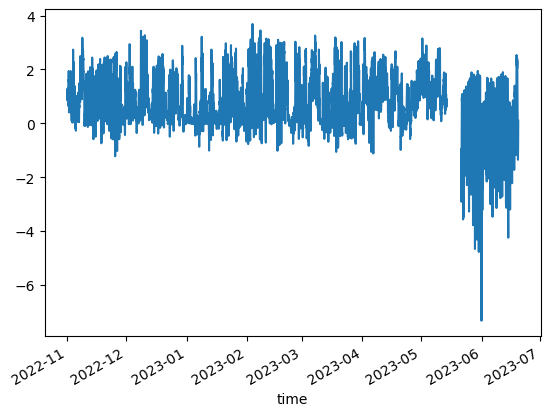

In [59]:
stability_df['static_stability'].plot()

We see that the stability was positive (stable) during the winter and spring, when there was snow. When the snow dissapears, unstable conditions prevail!